Explain what Network X is and is used for in this project--

In [22]:
#Load and inspect the first 5 rows of the edges for season 1
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

S1 = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
S1.head(5)

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


----

In [23]:
# Create a graph object and iterate throw the rows of the season 1 dataframe to add edges to graph
G_S1 = nx.Graph()
for _ , edge in S1.iterrows():
    G_S1.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'])
G_S1


The measure of degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has), this number can be normalized using all possible links. The degree centrality in the domain of Game of Thrones is the number of connections a character has compared to all possible connections in the story. 

In networkx we use the degree_centrality() function to find our the degree centrality of the nodes in a graph. The output of the degree_centrality() function is a dictionary with the nodes (characters) as the keys and thier corrisponding number of nodes connected to them / number of all nodes. This value is expressed as a number between 0 and 1. 

--explain findings

{'NED': 0.45238095238095233, 'TYRION': 0.32539682539682535, 'CATELYN': 0.2936507936507936, 'ROBERT': 0.2857142857142857, 'ROBB': 0.23809523809523808, 'CERSEI': 0.23015873015873015, 'ARYA': 0.2222222222222222, 'JOFFREY': 0.21428571428571427, 'JON': 0.20634920634920634, 'LITTLEFINGER': 0.20634920634920634}


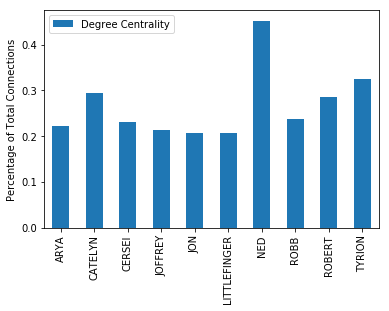

In [24]:
# Find the most important characters by degree centrality
degree_cent_S1 = nx.degree_centrality(G_S1)
sort_degree_cent_1 =dict(sorted(degree_cent_S1.items(), key=lambda x:x[1],reverse=True )[0:10])
print(sort_degree_cent_1)
df_sort_deg1 = pd.DataFrame.from_records([sort_degree_cent_1]).rename({0:'Degree Centrality'})
df_sort_deg1.T.plot(kind='bar')
plt.ylabel('Percentage of Total Connections')
plt.show()


---Explain Betweeness centrality

 Do you help to connect different parts of the networks?
 
 Betweenness Centrality

Betweenness centrality identifies nodes that are strategically positioned in the network, meaning that information will often travel through that person. Such an intermediary position gives that person power and influence. Betweenness centrality is a raw count of the number of short paths that go through a given node. For example, if a node is located on a bottleneck between two large communities, then it will have high betweenness.
 
 
 

{'NED': 0.30026126167071343, 'TYRION': 0.16145976276685722, 'CATELYN': 0.13227954417579132, 'ROBERT': 0.10930923572913841, 'DAENERYS': 0.10138740461169886, 'JON': 0.08544308870643987, 'ROBB': 0.07916384377204937, 'ARYA': 0.06561452566372701, 'PYP': 0.06026418443633793, 'JORAH': 0.053181703315620846}


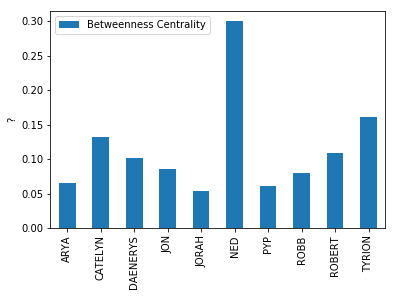

In [26]:
# sort_degree_cent_1 =dict(sorted(degree_cent_S1.items(), key=lambda x:x[1],reverse=True )[0:10])


bet_cent_S1 = nx.betweenness_centrality(G_S1 , weight='Weight')
sort_bet_cent_1 =dict(sorted(bet_cent_S1.items(), key=lambda x:x[1],reverse=True )[0:10])
print(sort_bet_cent_1)
df_sort_bet1 = pd.DataFrame.from_records([sort_bet_cent_1]).rename({0:'Betweenness Centrality'})
df_sort_bet1.T.plot(kind='bar')
plt.ylabel('?')
plt.show()

--Explain Eigenvector Centrality

Do you have many connections to important people?

Eigenvector Centrality

This is weighted degree centrality with a feedback loop. Having connections to “important” people makes you more important as well. In this measure, you get full credit for knowing someone important, even if you don’t know them very well. This measures how powerful your network is (in theory), regardless of whether you are using your network to its fullest potential.


{'NED': 0.04715616419807874, 'TYRION': 0.03421576416196941, 'CATELYN': 0.030123536269864998, 'ROBERT': 0.027644669033676038, 'ROBB': 0.024213795069761377, 'ARYA': 0.02259506148541733, 'JON': 0.020981232708901867, 'CERSEI': 0.020852308274445088, 'JOFFREY': 0.020119976919958742, 'LITTLEFINGER': 0.019092864706988247}


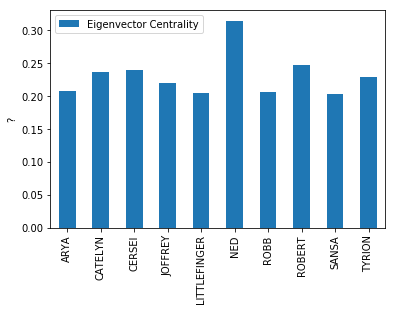

In [29]:
ec_S1 = nx.eigenvector_centrality(G_S1 , weight='Weight')
sort_ec_cent_1 =dict(sorted(ec_S1.items(), key=lambda x:x[1],reverse=True )[0:10])
print(sort_pr_cent_1)
df_sort_ec1 = pd.DataFrame.from_records([sort_ec_cent_1]).rename({0:'Eigenvector Centrality'})
df_sort_ec1.T.plot(kind='bar')
plt.ylabel('?')
plt.show()